# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])



# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice.
mice_count = mouse_metadata["Mouse ID"].count()

mice_count

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint_unique = mouse_data_complete.get(["Mouse ID","Timepoint"])

mouse_timepoint_unique


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dup= mouse_timepoint_unique.loc[mouse_timepoint_unique.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dup


array(['g989'], dtype=object)

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup_data = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989"]
mice_dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data_complete.drop_duplicates(inplace= True)
print(mouse_data_complete)

clean_data



     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [107]:
# Checking the number of mice in the clean DataFrame.
clean_mice = mouse_data_complete["Mouse ID"].nunique() 

clean_mice

249

## Summary Statistics

In [140]:
# Generate a summary statistics table of mean of the tumor volume for each regimen
regimen_mean = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
regimen_mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [120]:
# Generate a summary statistics table of median of the tumor volume for each regimen
regimen_median = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
regimen_median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [125]:
# Generate a summary statistics table of variance gof the tumor volume for each regimen

regimen_var = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
regimen_var.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [144]:
# Generate a summary statistics table of SEM of the tumor volume for each regimen
regimen_sem = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
regimen_sem.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Drug Regimen Mean":regimen_mean ,"Drug Regimen Median":regimen_median , "Drug Regimen Variance": regimen_var ,"Drug Regimen Standard Deviation": regimen_std, "Drug Regimen SEM": regimen_sem})
summary_stat


,Drug Regimen Mean,Drug Regimen Median,Drug Regimen Variance,Drug Regimen Standard Deviation,Drug Regimen SEM
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,61.168083,7.821003,0.581331
Propriva,52.368318,42.278090,42.278090,6.502160,0.514041
Ramicane,40.216745,23.486704,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,59.450562,7.710419,0.573111


In [149]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = mouse_data_complete.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
summary_agg                                                                               
                                                                                    

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

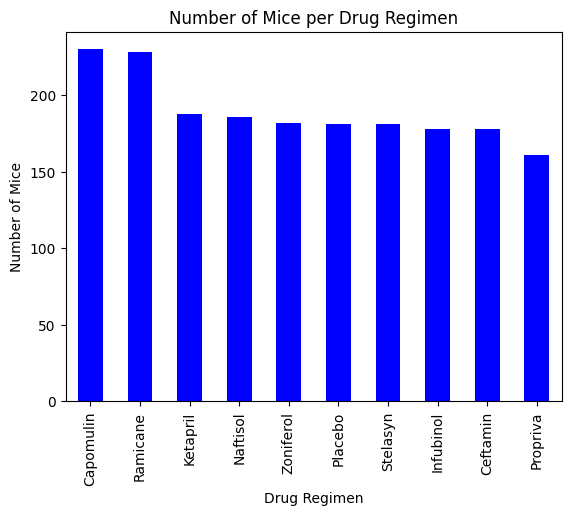

In [160]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = mouse_data_complete["Drug Regimen"].value_counts()
drug_count

plot_pandas = drug_count.plot.bar(color= 'b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")


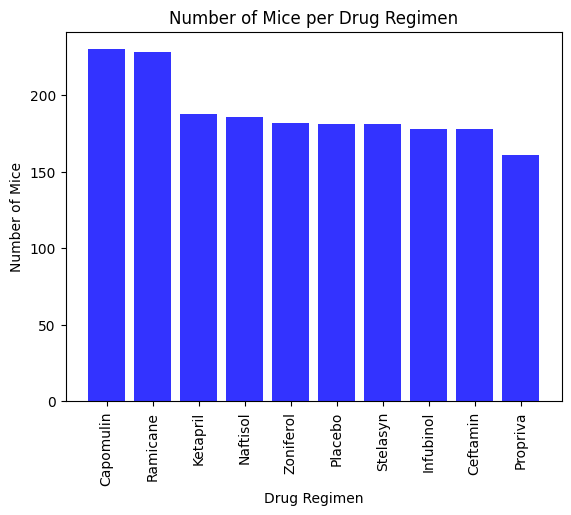

In [165]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values

plt.bar(x_axis, y_axis, color= 'b', alpha= 0.8, align= "center")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation= 'vertical')

plt.show()


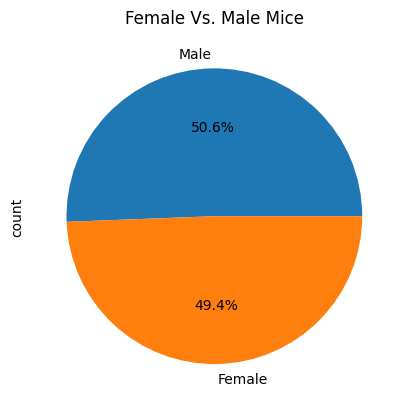

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = mouse_data_complete["Sex"].value_counts()
plt.title("Female Vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")

plt.show()

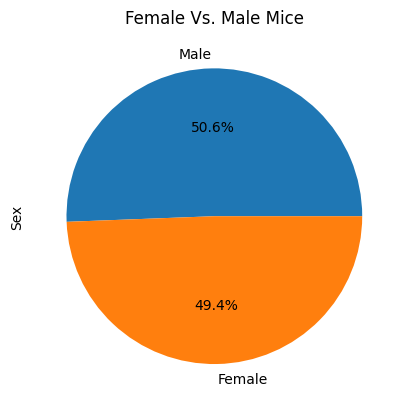

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y= 'Total Count', autopct= "%1.1f%%")
plt.title("Female Vs. Male Mice")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin", :]
Ramicane_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last= Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last= Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

 



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_last, mouse_data_complete, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_last, mouse_data_complete, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_last, mouse_data_complete, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_last, mouse_data_complete, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_vol = pd.DataFrame(Capomulin_last)
Ramicane_vol = pd.DataFrame(Ramicane_last)
Infubinol_vol = pd.DataFrame(Infubinol_last)
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [187]:
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 32.37735684
The upper quartile of Ramicane tumors is: 40.1592203
The interquartile range of Ramicane tumors is: 7.781863460000004
The median of Ramicane tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [188]:
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 32.37735684
The upper quartile of Infubinol tumors is: 40.1592203
The interquartile range of Infubinol tumors is: 7.781863460000004
The median of Infubinol tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [189]:
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


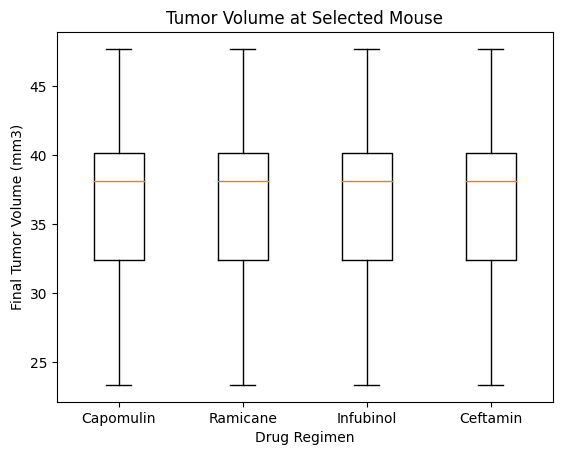

In [190]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

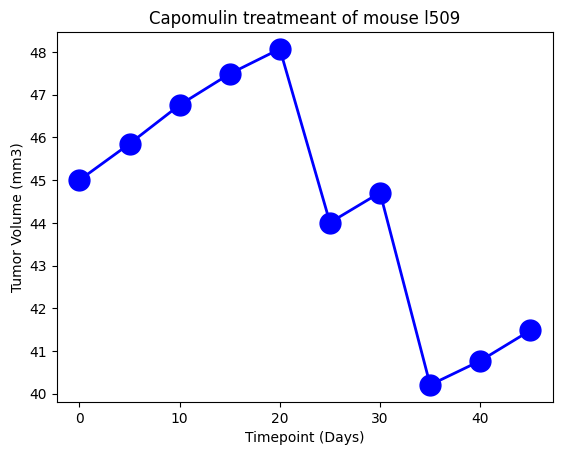

In [191]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

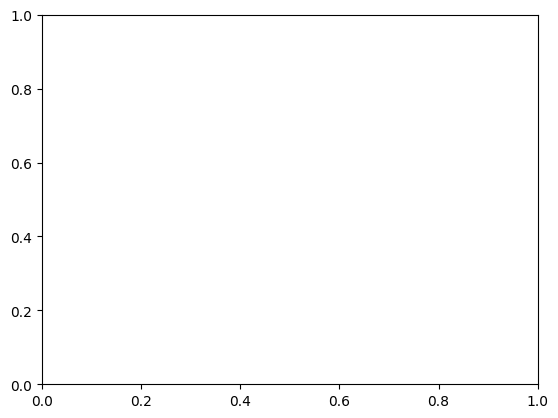

In [209]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [211]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

NameError: name 'avg_capm_vol' is not defined